In [33]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-448'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'In_Class_Assignments/turnover.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
turnover = pd.read_csv(file_content_stream)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
## Changing sales to dummy variables
turnover = pd.concat([turnover.drop(columns = ['sales'], axis = 1), pd.get_dummies(turnover['sales'])], axis = 1)

## Changing salary to dummy variables
turnover = pd.concat([turnover, pd.get_dummies(turnover['salary'])], axis = 1)

turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [35]:
## Defining the input and target variables
X = turnover.drop(columns = ['left', 'salary'], axis = 1)
Y = turnover['left']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

[Text(697.5, 951.3000000000001, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(348.75, 679.5, 'number_project <= 2.5\ngini = 0.478\nsamples = 3347\nvalue = [1320, 2027]'),
 Text(174.375, 407.70000000000005, 'last_evaluation <= 0.575\ngini = 0.204\nsamples = 1397\nvalue = [161, 1236]'),
 Text(87.1875, 135.89999999999998, 'gini = 0.101\nsamples = 1298\nvalue = [69, 1229]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.131\nsamples = 99\nvalue = [92, 7]'),
 Text(523.125, 407.70000000000005, 'satisfaction_level <= 0.115\ngini = 0.482\nsamples = 1950\nvalue = [1159, 791]'),
 Text(435.9375, 135.89999999999998, 'gini = 0.0\nsamples = 697\nvalue = [0, 697]'),
 Text(610.3125, 135.89999999999998, 'gini = 0.139\nsamples = 1253\nvalue = [1159, 94]'),
 Text(1046.25, 679.5, 'time_spend_company <= 4.5\ngini = 0.173\nsamples = 8652\nvalue = [7822, 830]'),
 Text(871.875, 407.70000000000005, 'average_montly_hours <= 290.5\ngini = 0.028\nsamples = 7076\nvalue 

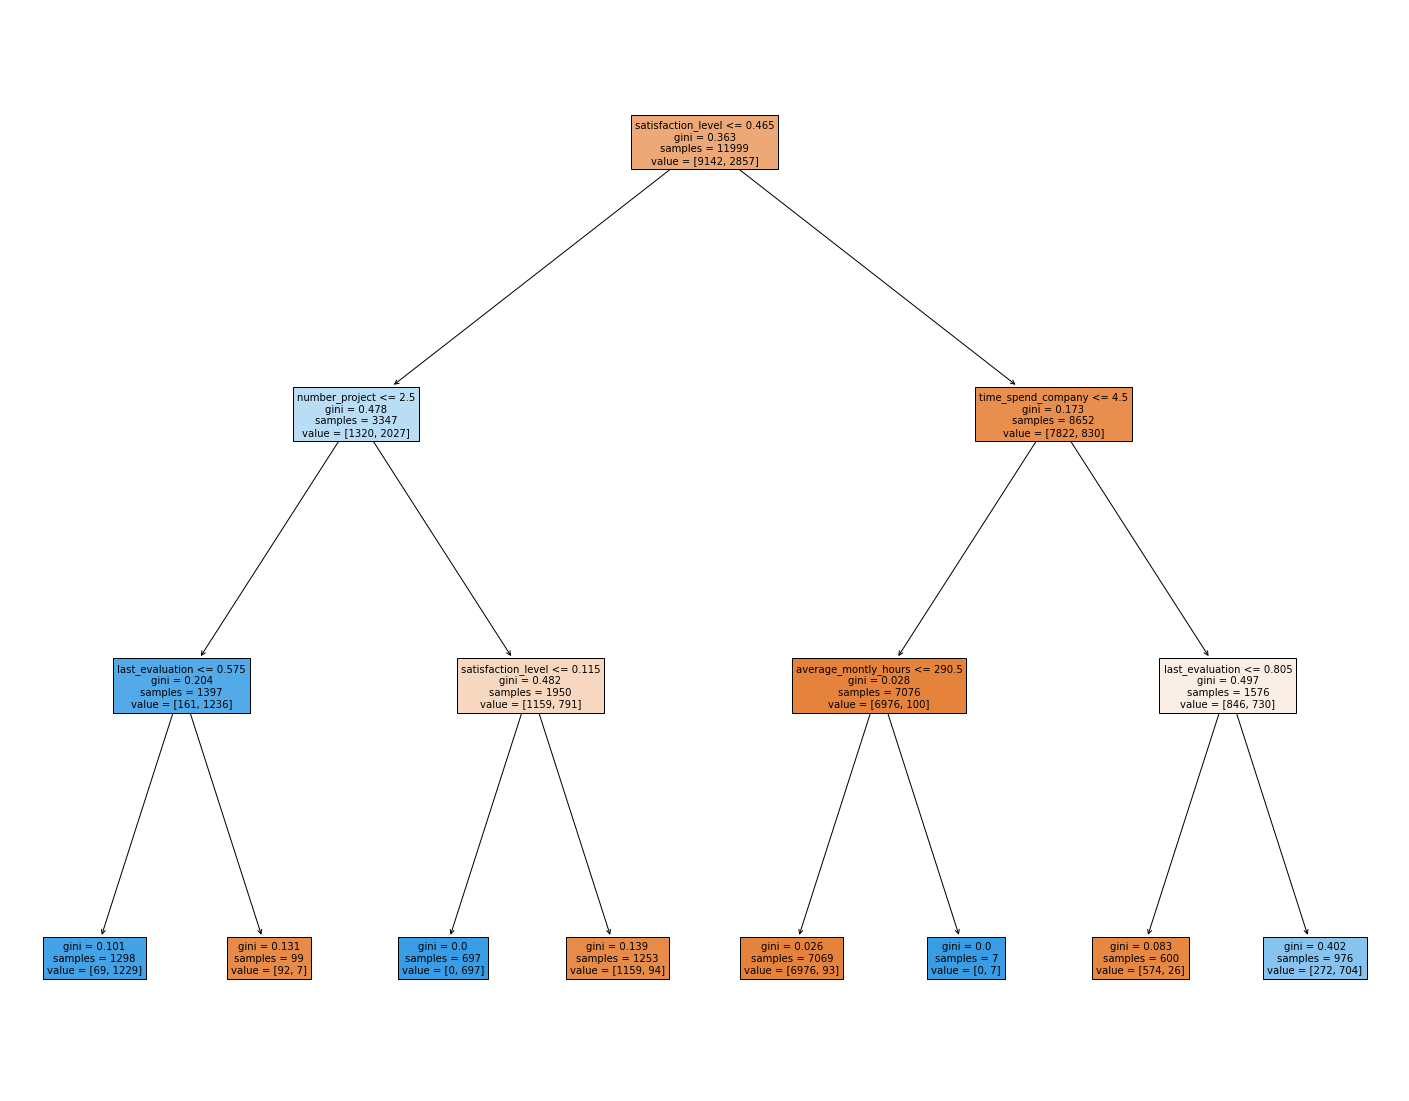

In [36]:
## Building decision tree 
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = X_train.columns, filled = True)

In [ ]:
## Creating interaction/features from decision tree
turnover['interaction_1'] = np.where((turnover['satisfaction_level'] >= 0.115) & (turnover['satisfaction_level'] <= 0.465) & (turnover['number']))